# 21M.387 Fundamentals of Music Processing
## Lab9

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact

import sys
sys.path.append("../common")
from util import *
import fmp

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 4)

## Exercise 1

Write the function `median(x)` that takes a numpy 1D array and returns the median of the list of numbers. Remember that if the list has an even number of items, the median is the average of the two middle ones.

You can compare your answer to the results of `np.median` to see if you get the same answer.

In [42]:
def median(x):
    length = len(x)
    y = sorted(x)
    if(length%2==0):
        return 0.5*(y[length/2]-1 + y[(length/2)])
    return y[length/2]
  
a = np.array([1,3,4,2,7,5,5,5,2])   # odd-length list
b = np.array([1,3,4,2,7,5,5,5,2,8]) # even-length list
print median(a), median(b)
print np.median(a), np.median(b)


4 4.5
4.0 4.5


## Exercise 2

Create the function `median_filter(x, L)`.
Inputs are 
- `x`, the signal
- `L`, the median filter window length.


Test it with the the arrays `a` and `b` above (using an odd number for `L`). You should get the same results via `medfilt` from `scipy.signal`

In [43]:
from scipy.signal import medfilt

def median_filter(x, L):
    return [median(x[i:i+L]) for i in range(len(x)-L+1)] #check indices

print median_filter(a,3)
print median_filter(b,3)


[3, 3, 4, 5, 5, 5, 5]
[3, 3, 4, 5, 5, 5, 5, 5]


## Exercise 3
- Plot the signal `x`. 
- Determine the smallest odd value of `L` needed to suppress the bump in the middle of the signal with a median filter.
- Plot that median-filtered version of `x` 

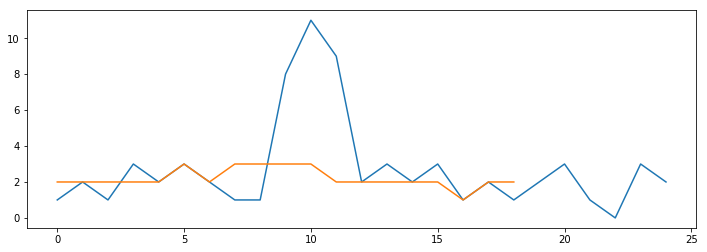

In [28]:
x = np.array([1,2,1,3,2,3,2,1,1,8,11,9,2,3,2,3,1,2,1,2,3,1,0,3,2])

plt.plot(x)
#make figure 2*n + 1 long, where n is the width of the bump to remove
filt = median_filter(x,7)
plt.plot(filt)


## Exercise 4

- Load the signal $x(n)$ below and listen to it.
- Calculate the $X(k)$, the Fourier Transform
- Plot $\vert X(k) \vert$
- Calculate $x_r(n)$ by using the inverse Fourier Transform (see `np.fft.irfft`)
- Plot $\Delta_x(n) = \vert x_r(n) - x(n) \vert$. Hopefully this signal is very close to 0.

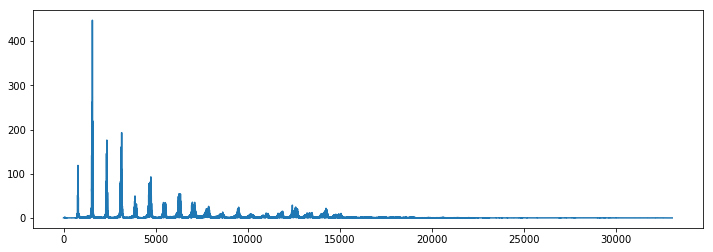

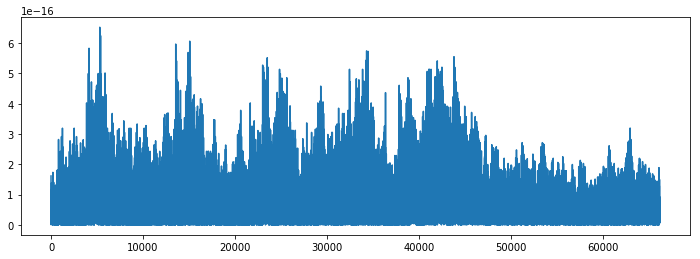

In [29]:
x = load_wav("audio/violin_c4.wav")

fs = 22050.
ipd.Audio(x,rate=fs)

X = np.fft.rfft(x) #real fourier transform
plt.plot(np.abs(X)) 
xr = np.fft.irfft(X) #original time signal

plt.figure()
plt.plot(np.abs(x-xr)) #essentially 0


Create a modified spectrum $X'(k)$ in each of the following 3 ways:
1. Multiply $X(k)$ by a linear ramp that goes from 0 to 1 across the range of $X(k)$.
- Zero out the frequencies in the range $k \in [3000:8000]$
- Zero out the frequencies in the range $k \in [1000:10000]$

For each modification, plot the $X'(k)$ and listen to the reconstructed $x'_r(n)$

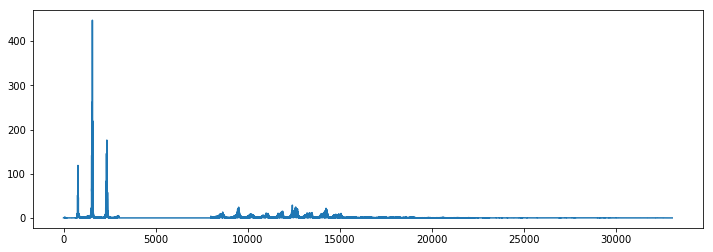

In [30]:
Xm = np.concatenate( (X[:3000], np.zeros(5000), X[8000:]))
plt.plot(np.abs(Xm))
ipd.Audio(np.fft.irfft(Xm), rate=fs)

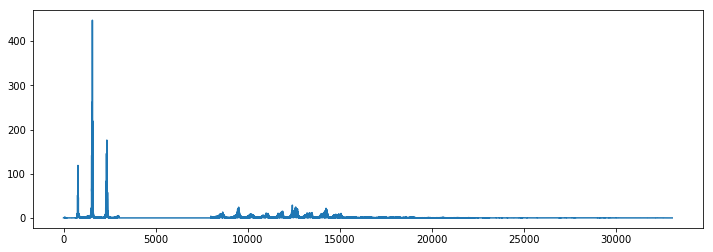

In [31]:
Xm = np.concatenate( (X[:3000], np.zeros(5000), X[8000:]))
plt.plot(np.abs(Xm))
ipd.Audio(np.fft.irfft(Xm), rate=fs)

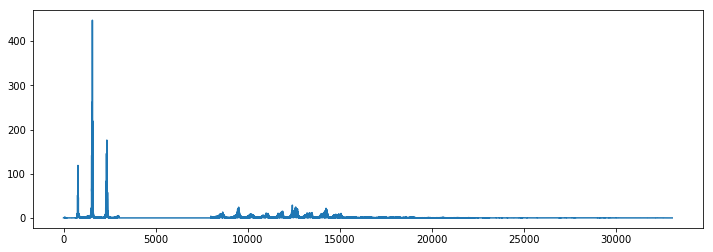

In [32]:
Xm = np.concatenate( (X[:3000], np.zeros(5000), X[8000:]))
plt.plot(np.abs(Xm))
ipd.Audio(np.fft.irfft(Xm), rate=fs)

## Exercise 5

- Choose a song. Save the first 30 seconds of the song as a mono 22k wave file.
- Load the song and create the spectrogram using `fmp.stft()`
- Create the power spectrogram (magnitude squared).
- Create the harmonic and percussive median-filtered versions using the power spectrogram. Use `medfilt` from `scipy.signal`
- Plot the 3 spectrograms (power, harmonic filtered, percussive filtered). You can use `plot_spectrogram()`


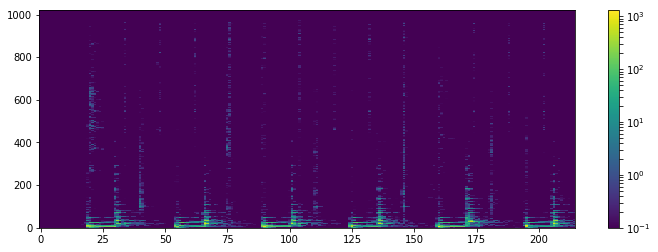

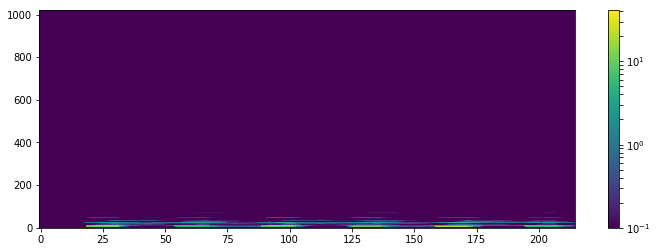

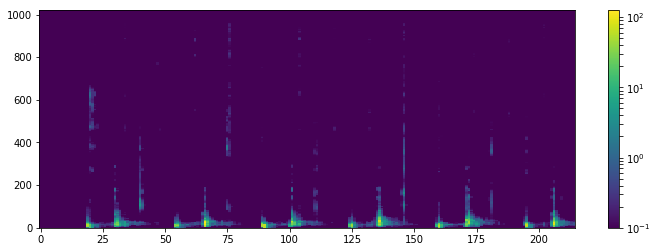

In [33]:
snd = load_wav("./audio/StingSevenDays.wav")
fft_size = 2038
hop_size = 1024
stft = fmp.stft(snd, fft_size, hop_size)
spec = np.abs(stft) ** 2

#filt_p = np.apply_along_axis(lambda x: median_filter(x, 25), axis=0)
#filt_h = np.apply_along_axis(lambda x: median_filter(x, 25), axis=1)

filt_p = medfilt(spec, (25, 1)) #want long thin rectange median filter
filt_h = medfilt(spec, (1, 25)) 

plt.figure()
plot_spectrogram(spec)
plt.figure()
plot_spectrogram(filt_h)
plt.figure()
plot_spectrogram(filt_p)



## Exercise 6a

- Create a harmonic and percussive binary mask using the filtered spectrograms.
- Use these masks to create a harmonic and percussive spectrogram (note: these should be complex valued spectrograms)
- Plot these masked versions.

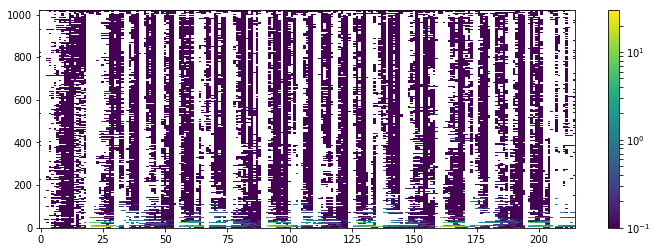

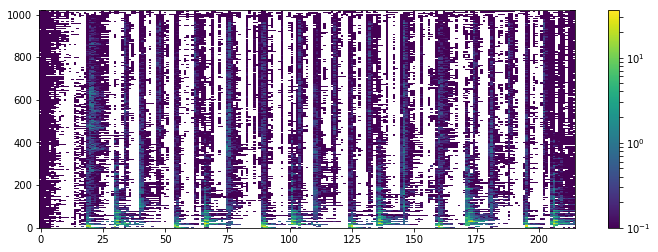

In [37]:
mask_h = filt_h > filt_p
mask_p = filt_p > filt_h

stft_h = stft * mask_h
stft_p = stft * mask_p

plt.figure()
plot_spectrogram(np.abs(stft_h)) #cannot have complex numbers in plt.spectrogram
plt.figure()
plot_spectrogram(np.abs(stft_p))

## Exercise 6b

Use the function `fmp.istft` to resynthesize the two audio signals, one from each masked spectrogram.  
Listen to these two audio files.  
How well did the separation work?

In [38]:
snd_h = fmp.istft(stft_h, hop_size)
snd_p = fmp.istft(stft_p, hop_size)
ipd.Audio(snd_h,rate=fs)
ipd.Audio(snd_p,rate=fs)

## Exercise 7a

Load the following audio, $x(n)$ and listen to it.
Create and plot $\lvert \mathcal{X}(n,k) \lvert$, the STFT using parameters:
- $N = 4096$
- $H = N/2$

In [ ]:
x = load_wav("audio/piano_arpeg.wav")
fft_size = 4096
hop_size = fft_size / 2


## Exercise 7b

Try to eliminate the middle note (it is an E, pitch=64) by this process:
- Copy $\mathcal{X}(n,k)$ to $\mathcal{X}'(n,k)$
- Modify $\mathcal{X}'(n,k)$ by zeroing out certain values (or ranges of values) of $k$.
- Resynthsize the signal from this modified spectrogram.

TypeError: Invalid dimensions for image data

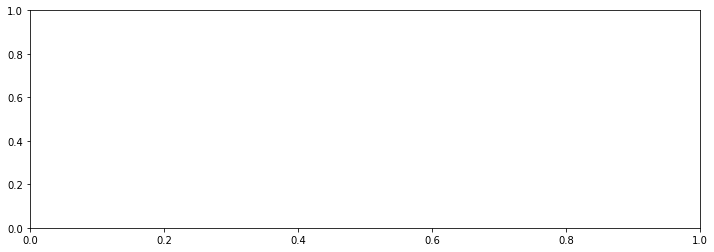

In [40]:
Xm = X.copy()
f0 = fmp.pitch_to_freq(64)
k0 = f0 * (fft_size / fs)
dk = 10
for h in range(1,20):
    k = int(round(h*k0))
    Xm[k-dk : k +dk] = 0
    
plot_spectrogram(np.abs(Xm))

ipd.Audio( fmp.istft(Xm, hop_size), rate=fs)

